In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 1. Veri çerçevesi (Data frame)

 Eğer daha önce excel ile çalışmışsanız, satırları ve sütünları olan tablo formatındaki veri gösterim formatına alışıksınız demektir. Pandas bize Python'da veri ile çalışırken, excel benzeri bir formatta çalışmamıza imkan verir. Nasıl ki NumPy array ile Python'da olmayan farklı ve kullanışlı bir veri yapısını kullanımımıza sunuyor, Pandas da veri çerçevesi (ya da orjinal ismiyle data frame) denilen bir veri yapısı ortaya koyuyor.

Veri çerçevesini, basitçe ifade edecek olursak, kolonları ve satırları olan NumPy dizileri bütünü gibi düşünebiliriz. Bootcamp boyunca verileri işlemede tercih edeceğiniz birincil yol veri çerçevelerini kullanmak olacak. Csv, excel, json dosyalarında ya da veritabanlarında bulunan verilerinizi, Pandas ile kolayca veri çerçevelerine dönüştürebilirsiniz. Telaşlanmayın, bahsettiğimiz herşeyin üstünden bu derste teker teker geçeceğiz.

### 1.1.Veri Çerçevesi Oluşturma

In [2]:
df = pd.DataFrame({'Ad' : ['İstanbul', 'Ankara', 'İzmir', 'Bursa', 'Antalya'],
                   'Nüfus':  [15029231, 5445026, 4279677, 2936803, 2364396],
                   'Kod' : ['34', '06', '35', '16', '07']
                  })
df

,Ad,Nüfus,Kod
0,İstanbul,15029231,34
1,Ankara,5445026,06
2,İzmir,4279677,35
3,Bursa,2936803,16
4,Antalya,2364396,07


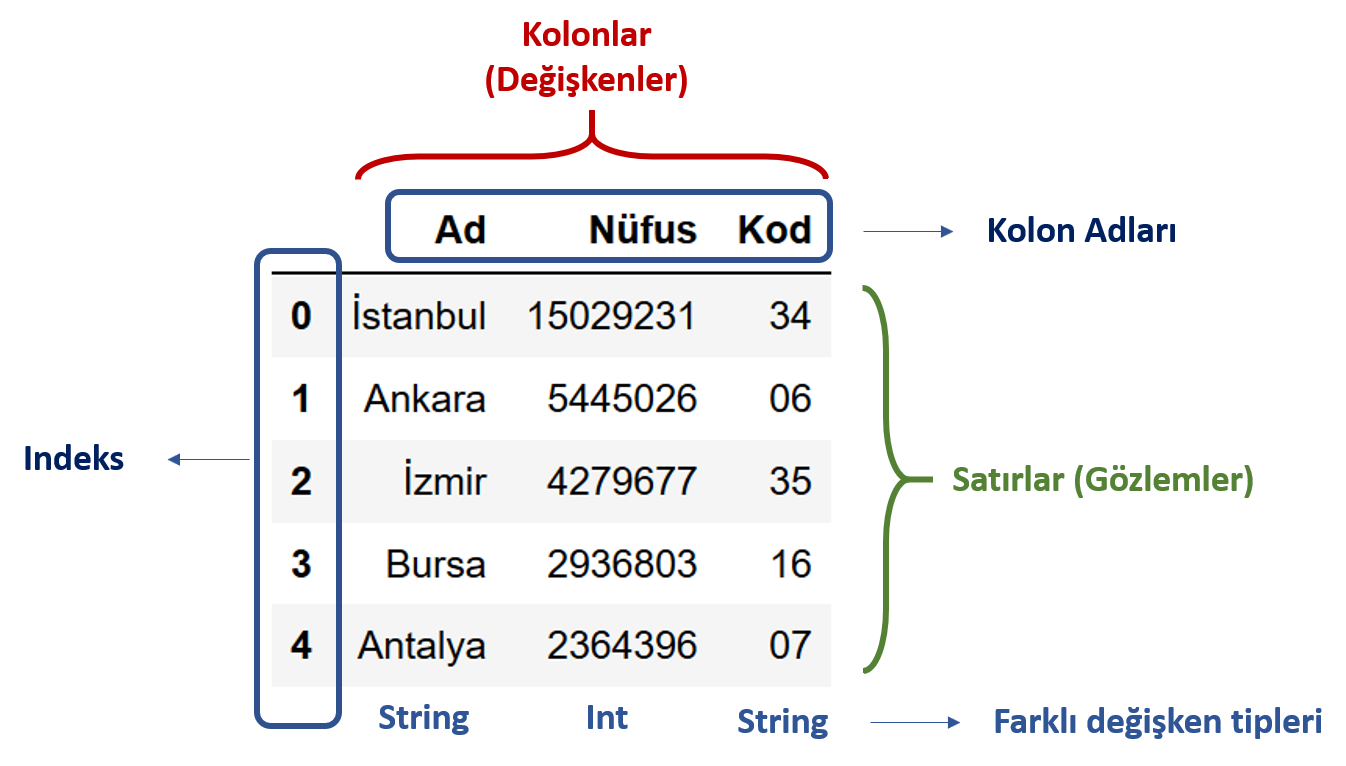

In [3]:
dizi = np.array([[0, 1, 2, 3], [4, 5, 6, 7]])
df = pd.DataFrame(dizi)
df
# Şimdi de iki boyutlu bir diziden veri çerçevesi oluşturalım.
# Bunun için pd.DataFrame() fonksiyonunu kullanalım ve bir NumPy dizisini veri çerçevesine dönüştürelim.

,0,1,2,3
0,0,1,2,3
1,4,5,6,7


In [4]:
df.columns = ['Kolon 1', 'Kolon 2', 'Kolon 3', 'Kolon 4']
df.index = ['Satır 1', 'Satır 2']
df
# Veri çerçevesinin oluşturulması sırasında veya sonrasında hem kolon isimlerini hem de indeksleri belirleyebilirsiniz.

,Kolon 1,Kolon 2,Kolon 3,Kolon 4
Satır 1,0,1,2,3
Satır 2,4,5,6,7


In [5]:
df2 = pd.DataFrame(
    dizi,
    columns=['Kolon 1', 'Kolon 2', 'Kolon 3', 'Kolon 4'],
    index=['Satır 1', 'Satır 2'])
df2
# İlk başta veri çerçevesini oluşturmak için pd.DataFrame() fonksiyonunu çağırdığımızda
# kolon ve endeks adlarını columns = veya index= argümanları aracılığıyla da belirleyebilirsiniz

,Kolon 1,Kolon 2,Kolon 3,Kolon 4
Satır 1,0,1,2,3
Satır 2,4,5,6,7


In [6]:
df = pd.DataFrame()
df['Kolon 1'] = [0, 1, 2, 3]
df['Kolon 2'] = [4, 5, 6, 7]
df
# Diğer değişkenlerde olduğu gibi burada da boş bir veri çerçevesi oluşturabilir, sonrasında veriler ekleyebiliriz.

,Kolon 1,Kolon 2
0,0,4
1,1,5
2,2,6
3,3,7


 Pep8 ile ilgili küçük bir not: Muhtemelen iki yanında boşluk olan ” = “ i değer atama için, “==” i ise karşılaştırma için kullanıyorsunuz. Python'da, okunabilirliği geliştirmek ve argumanlar atamalarını değişken atamalarından ayırt etmeyi kolaylaştırmak için “=” in iki yanında boşluk kullanılmaması alışkanlığı yerleşmiştir.

### 1.2. Daha Fazla Veri Ekleme

Veri çerçevelerinin gerçekten ne yapabileceğini göstermek için biraz fazlasını yapmamız gerekir. Listeler aracılığıyla adlandırılmış sütunlara sahip bir veri çerçevesini bir araya getirelim. pd.DataFrame() fonksiyonunu çağırarak ve satır isimleri olarak kullanmak istediğiniz endeksleri belirleyerek boş bir veri çerçevesi oluşturabiliriz. Ardından df ['COLUMN_NAME'] = [LIST_OF_VALUES] kullanarak sütun ekleyebiliriz.

In [7]:
ulke_kod = ['FR', 'GE', 'US', 'UK', 'CN']
ulkeler = pd.DataFrame(index=ulke_kod)
ulkeler.index.name = 'Kod'

ulkeler

""
Kod
FR
GE
US
UK
CN


Yeni bir sütun eklerken veri çerçevesinin ismi ile birlkte köşeli parantez kullanarak yeni bir kolon oluşturabilir ve değer atayabiliriz. Bu şekilde kolonlar ekleyelim.

In [8]:
ulkeler['Ülke'] = ['Fransa', 'Almanya', 'ABD', 'İngiltere', 'Çin']
ulkeler['Nüfus'] = [61083916, 82400996, 301139947, 60776238, 1318683096]
ulkeler['Yaşam Süresi'] = [80.657, 79.406, 78.242 ,79.425, 72.961]
ulkeler['Toplam Gelir'] = [2657213249384, 3439953462907, 14477635000000, 3074359743897, 3552182311652]
ulkeler['Kıta'] = ['Avrupa', 'Avrupa', 'Amerika', 'Avrupa', 'Asya']
ulkeler

,Ülke,Nüfus,Yaşam Süresi,Toplam Gelir,Kıta
Kod,,,,,
FR,Fransa,61083916,80.657,2657213249384,Avrupa
GE,Almanya,82400996,79.406,3439953462907,Avrupa
US,ABD,301139947,78.242,14477635000000,Amerika
UK,İngiltere,60776238,79.425,3074359743897,Avrupa
CN,Çin,1318683096,72.961,3552182311652,Asya


Artık elimizde gerçek verilere dayanan doğru bir veri çerçevesi var. Doğru ama bu veri ne zamana ait bir veri olduğu bilgisi yok. Tüm satırlara bir yıl bilgisi ekleyelim. Hepsine '2007' değerini ekleyeceğimiz için işimiz daha kısa bu sefer

In [9]:
ulkeler['Yıl'] = 2007
ulkeler

,Ülke,Nüfus,Yaşam Süresi,Toplam Gelir,Kıta,Yıl
Kod,,,,,,
FR,Fransa,61083916,80.657,2657213249384,Avrupa,2007
GE,Almanya,82400996,79.406,3439953462907,Avrupa,2007
US,ABD,301139947,78.242,14477635000000,Amerika,2007
UK,İngiltere,60776238,79.425,3074359743897,Avrupa,2007
CN,Çin,1318683096,72.961,3552182311652,Asya,2007


In [10]:
print(ulkeler["Yaşam Süresi"])

Kod
FR    80.657
GE    79.406
US    78.242
UK    79.425
CN    72.961
Name: Yaşam Süresi, dtype: float64


In [11]:
print(ulkeler.Nüfus)
print(ulkeler['Nüfus'])
# Her ikisi de kullanılabilir ancak kolon adında "boşluk" karakteri varsa noktalı rotasyonu kullanamayız.
# Bu nedenle köşeli parantez notasyonu daha çok tercih edilir.

Kod
FR      61083916
GE      82400996
US     301139947
UK      60776238
CN    1318683096
Name: Nüfus, dtype: int64
Kod
FR      61083916
GE      82400996
US     301139947
UK      60776238
CN    1318683096
Name: Nüfus, dtype: int64


In [12]:
ulkeler['Kişi_Başı_Gelir'] = (ulkeler['Toplam Gelir'] / ulkeler['Nüfus']).astype(int)
ulkeler
# Pandas ayrıca önceki verilerimizden yeni bir sütun oluşturmayı da çok kolaylaştırıyor.
# Önemli bir ekonomik gösterge olan kişi başı gelir veri çerçevemizde yok.
# Bunu oluşturmak ve sütunu "Kişi_Başı_Gelir" olarak adlandırmak istiyoruz.
# Bunu tek satırlık bir kodla yapabiliriz.

,Ülke,Nüfus,Yaşam Süresi,Toplam Gelir,Kıta,Yıl,Kişi_Başı_Gelir
Kod,,,,,,,
FR,Fransa,61083916,80.657,2657213249384,Avrupa,2007,43501
GE,Almanya,82400996,79.406,3439953462907,Avrupa,2007,41746
US,ABD,301139947,78.242,14477635000000,Amerika,2007,48076
UK,İngiltere,60776238,79.425,3074359743897,Avrupa,2007,50584
CN,Çin,1318683096,72.961,3552182311652,Asya,2007,2693


In [13]:
ulkeler['Toplam Gelir'] / ulkeler['Nüfus']
# Bazen hesapladığımız değeri sadece görmemiz bizim için yeterli olabilir. 
# Yalnızca bu değerleri görmek istiyorsak ve bunları veri çerçevemizde yeni bir sütun olarak saklamak zorunda değilsek,
# bu işlevi bir kolona atamadan da yapabiliriz.

Kod
FR    43501.029786
GE    41746.503439
US    48076.102637
UK    50584.897076
CN     2693.734622
dtype: float64

# 2.Satır/Sütun Seçme
### 2.1. Köşeli Parantez ile temel seçimler
Köşeli parantez ile tek bir sütunu seçebileceğimizi görmüştük. Bu şekilde tek sutundan oluşan dataframe parçası karşımıza Seri (Series) olarak çıkacak. Bu seri aynı zamanda tek boyutlu bir dizidir.

In [14]:
ulkeler['Ülke']

Kod
FR       Fransa
GE      Almanya
US          ABD
UK    İngiltere
CN          Çin
Name: Ülke, dtype: object

In [15]:
type (ulkeler['Ülke'])

pandas.core.series.Series

In [16]:
ulkeler[['Ülke']]
# Bu tek sütunu seri ya da dizi almak istemiyorsak, yine veri çerçevesinde tutmak istiyorsak iki köşeli parantez kullanmalıyız.

,Ülke
Kod,
FR,Fransa
GE,Almanya
US,ABD
UK,İngiltere
CN,Çin


In [17]:
type(ulkeler[['Ülke']])

pandas.core.frame.DataFrame

In [18]:
ulkeler[['Ülke', 'Yaşam Süresi']]

,Ülke,Yaşam Süresi
Kod,,
FR,Fransa,80.657
GE,Almanya,79.406
US,ABD,78.242
UK,İngiltere,79.425
CN,Çin,72.961


In [19]:
ulkeler[1:4]

,Ülke,Nüfus,Yaşam Süresi,Toplam Gelir,Kıta,Yıl,Kişi_Başı_Gelir
Kod,,,,,,,
GE,Almanya,82400996,79.406,3439953462907,Avrupa,2007,41746
US,ABD,301139947,78.242,14477635000000,Amerika,2007,48076
UK,İngiltere,60776238,79.425,3074359743897,Avrupa,2007,50584


# 2.2. .loc ve .iloc ile ileri seviye seçimler
.loc[] satır ve sütunları endeksleri ile seçmeye olanak tanıyan bir fonksiyondur. Bu fonksiyon, ilk parametre olarak satır etiketini, sonra da sütun adını alır. 
.iloc[] fonksiyonu ise aynı şeyi etiketler değil de endeksler üzerinde yapar.

Örneğin, Ülkeler veri veri çerçevesinde 'GE' satırını seçmek için, sadece 'GE' stringini köşeli parantez notasyonu ile Ulkeler.loc’a geçiririz.

In [20]:
ulkeler.loc['GE']

Ülke                     Almanya
Nüfus                   82400996
Yaşam Süresi              79.406
Toplam Gelir       3439953462907
Kıta                      Avrupa
Yıl                         2007
Kişi_Başı_Gelir            41746
Name: GE, dtype: object

In [21]:
ulkeler.loc[:, 'Ülke']
# Yukarıdaki ':', bir liste veya diziyi dilimlerken (slicing) yaptığımız gibi çalışır.
# Veri çerçevesinin başından sonuna kadar tüm satırları seçer.

Kod
FR       Fransa
GE      Almanya
US          ABD
UK    İngiltere
CN          Çin
Name: Ülke, dtype: object

In [22]:
ulkeler.loc['GE', 'Nüfus']

82400996

In [23]:
ulkeler.iloc[1:3, 1:4]

,Nüfus,Yaşam Süresi,Toplam Gelir
Kod,,,
GE,82400996,79.406,3439953462907
US,301139947,78.242,14477635000000


# 3. Koşullu seçim


 Şu ana kadar hiçbir koşul kullanmadan bir veri çerçevesinden satır ve sütünları nasıl seçebileceğimizi gördük. Şimdi ise belirli koşulları sağlayan satır ve sütünları nasıl seçebileceğimize bakalım.

İlk olarak, Python'da isimsiz fonksiyonlar tanımlamak için kullanılan bir yapı olan lambda fonksiyonu nu kullanacağız. Fonksiyonlar kısmında kısaca lambda'dan kısaca bahsetmiştik. Artık bu yapı daha sık kullanmaya başlayacağız. Python'ı yeni öğrenenler için bu seçenek anlaşılması zor gelebilir. Fakat endişelenmeyin, dersin devamında koşullu seçim yapmanın daha anlaşılır yöntemlerini anlatacağız.

In [24]:
ulkeler.loc[lambda df: ulkeler['Nüfus'] > 100000000, :]
# nüfusu 100 milyondan fazla olan ülkeleri görmek istiyoruz.

,Ülke,Nüfus,Yaşam Süresi,Toplam Gelir,Kıta,Yıl,Kişi_Başı_Gelir
Kod,,,,,,,
US,ABD,301139947,78.242,14477635000000,Amerika,2007,48076
CN,Çin,1318683096,72.961,3552182311652,Asya,2007,2693


Problemimizde satırları seçtiğimiz için lambda fonksiyonunu köşeli parantez içindeki ilk argüman olarak girdik. Lambda fonksiyonuna girdi olarak 'df' adında bir veri çerçevesi veriyoruz. Sonra, her bir satırın değerlendirileceği koşulu tanımlıyoruz. Köşeli parantez içindeki ,: dilimleme sözdiziminin aynısıdır ve yukarıdaki gibi aynı mantığı kullanarak tüm sütunları istediğimiz anlamına gelir.

Şimdi, koşullu seçimi lambda fonksiyonlarını kullanmadan nasıl yapabileceğimize bakalım. Boolean mantığını kullanarak seçim yapmanın daha basit bir yolu var ve kullanım olarak da oldukça yaygındır. Siz de koşullu seçimler yapmak istediğinizde aşağıda göstereceğimiz yolu kullanabilirsiniz

In [25]:
ulkeler[ulkeler['Nüfus'] > 100000000]

,Ülke,Nüfus,Yaşam Süresi,Toplam Gelir,Kıta,Yıl,Kişi_Başı_Gelir
Kod,,,,,,,
US,ABD,301139947,78.242,14477635000000,Amerika,2007,48076
CN,Çin,1318683096,72.961,3552182311652,Asya,2007,2693


# 4. Gruplama
Gruplandırma işlemlerini, veri çerçevemiz üzerinden .groupby() metodunu kullanarak yaparız.

In [26]:
ulkeler.groupby('Kıta')

Dikkat ettiyseniz, yukarıdaki satırı çalıştırdığımızda bize veri çerçevemiz içindeki verileri döndürmedi. Gruplandırmayı temsil eden bir nesne döndürdü. Mantığı şu: gruplandırma sonucunda bir veri döndürmek istiyorsak, o gruplarda bazı işlemler yapmamız gerekiyor. Örneğin .sum() veya .count() gibi metodları kullanarak grupların toplamını ya da grup içindeki elemen sayısını döndürebiliriz.

In [27]:
ulkeler.groupby(by='Kıta').mean()['Kişi_Başı_Gelir']

Kıta
Amerika    48076
Asya        2693
Avrupa     45277
Name: Kişi_Başı_Gelir, dtype: int32

In [28]:
ulkeler.groupby(by='Kıta').sum()['Nüfus']

Kıta
Amerika     301139947
Asya       1318683096
Avrupa      204261150
Name: Nüfus, dtype: int64

# 5. Veri çerçevelerini bağlama/birleştirme
Veri çerçevelerini birleştime iki türlü olabilir. Bir veri çerçevesine başka bir veri çerçevesinden satırlar ekleyebiliriz. Ya da başka bir veri çerçevesinden kolonlar alabiliriz.

### 5.1. Veri çerçevelerini birbirine bağlama (Concatenation)
Bir veri çerçevesinin sonuna diğer veri vçerçevesini yeni satırlar olarak ekleyebiliriz. Bu birbirine bağlama (concatenation) işleminin ve .concat() komutu ile kolayca gerçekleştirebiliriz.

Ulkeler veri çerçevesine bir veri çerçevesi ekleyelim.

In [29]:
yeni_ulkeler = pd.read_csv('Yeni_Ulkeler.csv', index_col=0)
yeni_ulkeler

,Ülke,Nüfus,Yaşam Süresi,Toplam Gelir,Kıta,Kişi_Başı_Gelir,Yıl
Kod,,,,,,,
IT,İtalya,58147733,80.546,2203053380782,Avrupa,37887,2007
IN,Hindistan,1110396331,64.698,1201111768410,Asya,1081,2007
JP,Japonya,127467972,82.603,4515264514430,Asya,35422,2007


In [30]:
tum_ulkeler = pd.concat([ulkeler, yeni_ulkeler])
tum_ulkeler

,Kişi_Başı_Gelir,Kıta,Nüfus,Toplam Gelir,Yaşam Süresi,Yıl,Ülke
Kod,,,,,,,
FR,43501,Avrupa,61083916,2657213249384,80.657,2007,Fransa
GE,41746,Avrupa,82400996,3439953462907,79.406,2007,Almanya
US,48076,Amerika,301139947,14477635000000,78.242,2007,ABD
UK,50584,Avrupa,60776238,3074359743897,79.425,2007,İngiltere
CN,2693,Asya,1318683096,3552182311652,72.961,2007,Çin
IT,37887,Avrupa,58147733,2203053380782,80.546,2007,İtalya
IN,1081,Asya,1110396331,1201111768410,64.698,2007,Hindistan
JP,35422,Asya,127467972,4515264514430,82.603,2007,Japonya


In [31]:
ulkeler = pd.read_csv('Ulke_Bilgileri.csv')
yeni_ulkeler = pd.read_csv('Yeni_Ulkeler.csv')
tum_ulkeler = pd.concat([ulkeler, yeni_ulkeler])
tum_ulkeler
# iki veri çerçevesinde ortak indeksler olsaydı küçük bir işlem yapmamız gerekirdi.


,Kişi_Başı_Gelir,Kod,Kıta,Nüfus,Toplam Gelir,Yaşam Süresi,Yıl,Ülke
0,43501,FR,Avrupa,61083916,2657213249384,80.657,2007,Fransa
1,41746,GE,Avrupa,82400996,3439953462907,79.406,2007,Almanya
2,48076,US,Amerika,301139947,14477635000000,78.242,2007,ABD
3,50584,UK,Avrupa,60776238,3074359743897,79.425,2007,İngiltere
4,2693,CN,Asya,1318683096,3552182311652,72.961,2007,Çin
0,37887,IT,Avrupa,58147733,2203053380782,80.546,2007,İtalya
1,1081,IN,Asya,1110396331,1201111768410,64.698,2007,Hindistan
2,35422,JP,Asya,127467972,4515264514430,82.603,2007,Japonya


In [32]:
tum_ulkeler = pd.concat([ulkeler, yeni_ulkeler], ignore_index=True)
tum_ulkeler
# Indekslerin otomatik olarak numara olduğu veri çerçevelerine bakalım.
# gnore_index=True ifadesini kullanmak işinize yarayabilir.

,Kişi_Başı_Gelir,Kod,Kıta,Nüfus,Toplam Gelir,Yaşam Süresi,Yıl,Ülke
0,43501,FR,Avrupa,61083916,2657213249384,80.657,2007,Fransa
1,41746,GE,Avrupa,82400996,3439953462907,79.406,2007,Almanya
2,48076,US,Amerika,301139947,14477635000000,78.242,2007,ABD
3,50584,UK,Avrupa,60776238,3074359743897,79.425,2007,İngiltere
4,2693,CN,Asya,1318683096,3552182311652,72.961,2007,Çin
5,37887,IT,Avrupa,58147733,2203053380782,80.546,2007,İtalya
6,1081,IN,Asya,1110396331,1201111768410,64.698,2007,Hindistan
7,35422,JP,Asya,127467972,4515264514430,82.603,2007,Japonya


Yukarıdaki örnekte veri çerçevelerini alt alta birleştirdik. Yanyana birleştirmek istediğimizde .concat komutu içerisinde ekseni axis=1 şeklinde belirterek yan yana birbirine bağlama yapabilririz.

"0" numaralı eksenin satırları, "1" numaralı ekseninde sütunları ifade ettiğini yeri gelmişken belirtelim.



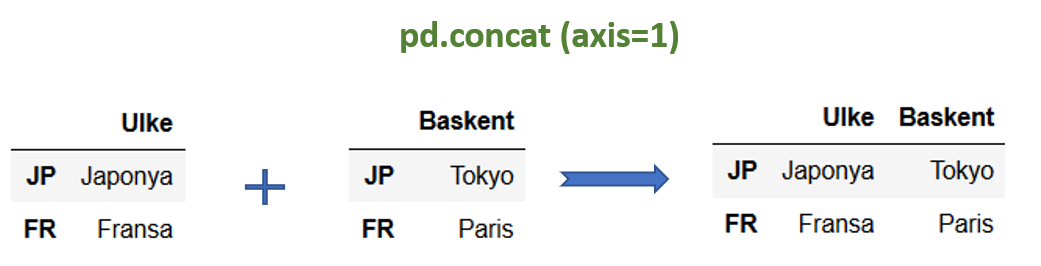

In [33]:
ulkeler = pd.DataFrame({'Ulke':  ['Japonya', 'Fransa']}, 
                          index=['JP', 'FR'])
baskentler = pd.DataFrame({'Baskent':  ['Tokyo', 'Paris']}, 
                          index=['JP', 'FR'])

In [34]:
ulke_baskentleri = pd.concat([ulkeler, baskentler], axis=1)
ulke_baskentleri


,Ulke,Baskent
JP,Japonya,Tokyo
FR,Fransa,Paris


# 5.2. Veri çerçevelerini birleştirme (Merge)
Veri çerçevelerini birleştirmenin diğer bir yöntemi .merge() komutu ile birleştirmedir. .concat() ile veri çerçeveleri birbirine eklenirken. .merge() ile veri tabanlarında yapılan işlemlere benzer şekilde sütunları birleştirebiliriz.

Yine ülkelere veri birleştirelim.

In [35]:
ulkeler = pd.DataFrame({'Ulke':  ['Japonya', 'Fransa', 'Almanya'],
                       'Kıta': ['Asya', 'Avrupa', 'Avrupa']})
baskentler = pd.DataFrame({'Ad':  ['Fransa', 'Japonya', 'Almanya'],
                           'Baskent':  ['Paris', 'Tokyo', 'Berlin']})

In [36]:
pd.merge(ulkeler, baskentler, left_on='Ulke', right_on='Ad')

,Ulke,Kıta,Ad,Baskent
0,Japonya,Asya,Japonya,Tokyo
1,Fransa,Avrupa,Fransa,Paris
2,Almanya,Avrupa,Almanya,Berlin


Şimdi merge() komutunun yaptığına bakalım. concat() komutunda arka arkaya, yan yana yada index numaralarına göre birleştirme yapabiliriz.

Ama bu veri çerçevelerinde, sutun isimleri de indekler de farklı. Bu yüzden merge() ile satırlardaki verileri de inceleyip karşılaştırıp birleştirme yapabiliyoruz.

# 6.1. Pandas ile dosya okuma
### CSV dosyaları

In [37]:
df = pd.read_csv('Ulke_Bilgileri.csv')
df


,Kod,Ülke,Nüfus,Yaşam Süresi,Toplam Gelir,Yıl,Kişi_Başı_Gelir,Kıta
0,FR,Fransa,61083916,80.657,2657213249384,2007,43501,Avrupa
1,GE,Almanya,82400996,79.406,3439953462907,2007,41746,Avrupa
2,US,ABD,301139947,78.242,14477635000000,2007,48076,Amerika
3,UK,İngiltere,60776238,79.425,3074359743897,2007,50584,Avrupa
4,CN,Çin,1318683096,72.961,3552182311652,2007,2693,Asya


In [38]:
df = pd.read_csv('Ulke_Bilgileri.csv', index_col=0)
df
# iz kendi indeksimizi kendimiz seçelim. Bunun için index_col= 0 ifadesini kullanabiliriz.

,Ülke,Nüfus,Yaşam Süresi,Toplam Gelir,Yıl,Kişi_Başı_Gelir,Kıta
Kod,,,,,,,
FR,Fransa,61083916,80.657,2657213249384,2007,43501,Avrupa
GE,Almanya,82400996,79.406,3439953462907,2007,41746,Avrupa
US,ABD,301139947,78.242,14477635000000,2007,48076,Amerika
UK,İngiltere,60776238,79.425,3074359743897,2007,50584,Avrupa
CN,Çin,1318683096,72.961,3552182311652,2007,2693,Asya


Veri bilimcisi olarak çalışırken, genellikle bir dosyaya veri çıkışı yapmak istersiniz. csv’ler muhtemelen bunun için kullanabileceğiniz en kullanışlı formatlardan birisidir. Bir csv dosyası oluşturmak ve veri çerçevenizi aktarmak için df.to_csv() metodunu kullanırız.

### JSON dosyaları

In [39]:
df = pd.read_json('Ulke_Bilgileri.json', encoding='utf8')
df

,Ulke,Nufus,Yasam Suresi,Toplam Gelir,Yil,Kisi_Basi_Gelir,Kita
FR,Fransa,61083916,80.657,2657213249384,2007,43501,Avrupa
GE,Almanya,82400996,79.406,3439953462907,2007,41746,Avrupa
US,ABD,301139947,78.242,14477635000000,2007,48076,Amerika
UK,İngiltere,60776238,79.425,3074359743897,2007,50584,Avrupa
CN,Çin,1318683096,72.961,3552182311652,2007,2693,Asya


In [40]:
df.to_json()

'{"Ulke":{"FR":"Fransa","GE":"Almanya","US":"ABD","UK":"\\u0130ngiltere","CN":"\\u00c7in"},"Nufus":{"FR":61083916,"GE":82400996,"US":301139947,"UK":60776238,"CN":1318683096},"Yasam Suresi":{"FR":80.657,"GE":79.406,"US":78.242,"UK":79.425,"CN":72.961},"Toplam Gelir":{"FR":2657213249384,"GE":3439953462907,"US":14477635000000,"UK":3074359743897,"CN":3552182311652},"Yil":{"FR":2007,"GE":2007,"US":2007,"UK":2007,"CN":2007},"Kisi_Basi_Gelir":{"FR":43501,"GE":41746,"US":48076,"UK":50584,"CN":2693},"Kita":{"FR":"Avrupa","GE":"Avrupa","US":"Amerika","UK":"Avrupa","CN":"Asya"}}'

### Python open()

In [41]:
with open('Ulke_Bilgileri.json') as file:
    text = file.readlines()
    print("Bu dosya {} satır uzunluğunda.".format(len(text)))
    for line in text:
        print(line)

Bu dosya 7 satır uzunluğunda.
{"Ulke":{"FR":"Fransa","GE":"Almanya","US":"ABD","UK":"Ä°ngiltere","CN":"Ã‡in"},

 "Nufus":{"FR":61083916,"GE":82400996,"US":301139947,"UK":60776238,"CN":1318683096},

 "Yasam Suresi":{"FR":80.657,"GE":79.406,"US":78.242,"UK":79.425,"CN":72.961},

 "Toplam Gelir":{"FR":2657213249384,"GE":3439953462907,"US":14477635000000,"UK":3074359743897,"CN":3552182311652},

 "Yil":{"FR":2007,"GE":2007,"US":2007,"UK":2007,"CN":2007},

 "Kisi_Basi_Gelir":{"FR":43501,"GE":41746,"US":48076,"UK":50584,"CN":2693},

 "Kita":{"FR":"Avrupa","GE":"Avrupa","US":"Amerika","UK":"Avrupa","CN":"Asya"}}


Dikkat etmeniz gereken önemli bir husus, open() ile bir dosya açarsanız, siz dosyayı kapatana kadar açık kalacağını bilmenizdir. Dosyayla işiniz bittikten sonra, .close()metodu ile dosyayı kapatabilirsiniz. Kaynakları tutan dosyaları el ile kapatmayı unutmak çok kolaydır ve beklenmedik bir soruna neden olabilir. Neyse ki, Python bize with ifadesini sunar. Böylelikle, yukarıdaki nedenle .close() fonksiyonunu kullanmanız gerekmez, çünkü with ile açılan dosyalar with ifadesinden çıkıldıktan sonra otomatik olarak kapatılır. Bu yöntem dosyaları el ile açarken başka zorlayıcı bir sebebiniz yoksa kullanılabilecek en iyi yöntemdir.

# ENCODİNG

- Hangi karakterleri kullanabileceğinizi nereden biliyoruz?
- Birleri ve sıfırları okunabilen bu özel karakterlere nasıl çeviriyoruz?

 Bu soruların net bir cevabı var: Unicode ve UTF-8. Python 3'teki tüm stringler unicode’dur ve utf-8 mümkün olduğunda Python'un kullandığı varsayılan kodlamadır. Ancak, bazı dosyalar eski olduğundan veya onları oluşturmak için kullanılan yazılım eski olduğundan farklı kodlamalarla oluşturulan dosyalarla karşılaşabilirsiniz. Maalesef bir dosyanın kodlamasını otomatik olarak belirlemek ve sonra doğru olarak kodunu çözmek mümkün değildir. Kodlama hatalarıyla karşılaştığınızda muhtemel kodlamayı tahmin etmeniz ve deneme yanılma yapmanız gerekir.